In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [2]:
#read files
envdf = pd.read_csv('World_countries_env_vars.csv')
hdidf = pd.read_csv('HDI.csv')
happinessdf = pd.read_csv('2017.csv')

In [3]:
#clean up data
hdidf_index = hdidf.set_index('Country')
clean_hdidf = hdidf_index.rename(index = {"Bolivia (Plurinational State of)": "Bolivia",
                                        "Brunei Darussalam": "Brunei",
                                        "Guinea-Bissau":"Guinea Bissau",
                                        "Hong Kong, China (SAR)":"Hong Kong",
                                        "Iran (Islamic Republic of)":"Iran",
                                        "Lao People's Democratic Republic":"Laos",
                                        "Moldova (Republic of)":"Moldova",
                                        "Russian Federation":"Russia",
                                        "Syrian Arab Republic":"Syria",
                                        "Venezuela (Bolivarian Republic of)":"Venezuela",
                                        "Viet Nam":"Vietnam"
                                         }) 
envdf_index = envdf.set_index('Country')
clean_envdf = envdf_index.rename(index = {"United States of America": "United States",
                                        "Hong Kong S.A.R.": "Hong Kong",})
                                          
happinessdf_index = happinessdf.set_index('Country')
clean_happinessdf = happinessdf_index.rename(index = {"Hong Kong S.A.R., China": "Hong Kong", }) 

In [4]:
#merge 
combineddf = clean_envdf.merge(clean_hdidf,  how = 'inner' , on='Country')
combineddf1 = combineddf.merge(clean_happinessdf, how = 'inner' , on='Country')

In [5]:
#bins
percapitabins = [0]
powers_5 = [1000*5**n for n in range(0,5)]
percapitabins .extend(powers_5)
percapitalabels = [f'0 upto 1000']
for n in range(1,5):
   percapitalabels.append(f'{1000*5**(n-1)} till {1000*5**(n)}')
print(percapitabins ,percapitalabels)
combineddf1["binnedpercapita"] = pd.cut(combineddf1['Gross national income (GNI) per capita'], bins=percapitabins , labels=percapitalabels)
combineddf1.to_excel('converted.xls')

[0, 1000, 5000, 25000, 125000, 625000] ['0 upto 1000', '1000 till 5000', '5000 till 25000', '25000 till 125000', '125000 till 625000']


In [6]:
#combineddf1
#combineddf1[combineddf1.isnull().any(axis=1)][null_columns].head()
combineddf1.columns[combineddf1.isnull().any()]

Index(['elevation', 'aspect', 'slope', 'wind', 'cloudiness', 'HDI Rank', 'HDI',
       'Mean years of schooling', 'GNI per capita rank minus HDI rank',
       'Change in HDI rank 2010-2015', 'Average annual HDI growth 1990-2000',
       'Average annual HDI growth 2000-2010',
       'Average annual HDI growth 2010-2015',
       'Average annual HDI growth 1990-2015', 'Gender Development Index value',
       'Gender Development Index Group',
       'Human Development Index (HDI) Female',
       'Human Development Index (HDI) Male', 'Mean years of schooling Female',
       'Mean years of schooling Male',
       'Estimated gross national income per capita Female',
       'Estimated gross national income per capita Male',
       'Share of seats in parliament (% held by women)',
       'Population with at least some secondary education % (2005-2015) Female',
       'Population with at least some secondary education % (2005-2015) Male',
       'Population Ages 15–64 (millions) 2015',
       'I

In [7]:
#plt.scatter(combineddf1['HDI'], combineddf1['Gross national income (GNI) per capita'])
nullcolumns = combineddf1.isnull().sum(axis=0)
nullcolumns
nullcolumns[nullcolumns==1]

elevation                                                    1
aspect                                                       1
slope                                                        1
HDI Rank                                                     1
HDI                                                          1
Mean years of schooling                                      1
GNI per capita rank minus HDI rank                           1
Change in HDI rank 2010-2015                                 1
Average annual HDI growth 2010-2015                          1
Estimated gross national income per capita Female            1
Estimated gross national income per capita Male              1
Share of seats in parliament (% held by women)               1
Population Ages 15–64 (millions) 2015                        1
Infants lacking immunization DTP (% of one-year-olds)        1
Infants lacking immunization Measles (% of one-year-olds)    1
Mortality rates Infant (per 1,000 live births) 2015    

In [8]:
#plt.scatter(combineddf1['tree_canopy_cover'], combineddf1['Life expectancy'])
combineddf1['Share of seats in parliament (% held by women)'] = combineddf1[['Share of seats in parliament (% held by women)']].fillna(combineddf1.groupby('binnedpercapita').transform('mean'))
#combineddf1[['Share of seats in parliament (% held by women)']].fillna(2)
nullcolumns1 = combineddf1.isnull().sum(axis=0)
nullcolumns1
nullcolumns1[nullcolumns1==1]
#[x for x in combineddf1['Share of seats in parliament (% held by women)']]

elevation                                                    1
aspect                                                       1
slope                                                        1
HDI Rank                                                     1
HDI                                                          1
Mean years of schooling                                      1
GNI per capita rank minus HDI rank                           1
Change in HDI rank 2010-2015                                 1
Average annual HDI growth 2010-2015                          1
Estimated gross national income per capita Female            1
Estimated gross national income per capita Male              1
Population Ages 15–64 (millions) 2015                        1
Infants lacking immunization DTP (% of one-year-olds)        1
Infants lacking immunization Measles (% of one-year-olds)    1
Mortality rates Infant (per 1,000 live births) 2015          1
Mortality rates Under-five (per 1,000 live births) 2015

In [9]:
#combineddf1['HDI'].corr(combineddf1['accessibility_to_cities'])
#corr = combineddf1['accessibility_to_cities'].corr(combineddf1['HDI'])
#mask = np.zeros_like(corr, dtype=np.bool)

In [10]:
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
#sns.heatmap(corr)
#plt.matshow(combineddf1.corr())

In [11]:
#Following shows the correlation of each column with other column
#combineddf1.corr()

In [12]:
#happinessdf.corr()

In [13]:
#plt.matshow(happinessdf.corr())

In [14]:
#Correlattion of Happiness with Internet users
combineddf1['Internet users'].corr(combineddf1['Happiness.Score'])

0.8066985073861793

In [15]:
#plt.scatter(combineddf1['Internet users'], combineddf1['Happiness.Score'])

In [16]:
#combineddf1[['Internet users (% 2010 -2015)', 'Happiness.Score']]

In [17]:
#combineddf2 = combineddf1[combineddf1.isna().any()=False]
# Creating a dataframe with only columns that are all non-nulls
combineddf2 = combineddf1.dropna( axis=1, how='any', thresh=None, subset=None)
combineddf2.to_excel('nonulls.xls')
#Creating a series that checks correltion between Happiness score and all other columns
correlations = combineddf2[combineddf2.columns[:]].corr()['Happiness.Score'][:]


In [18]:
type(correlations)

pandas.core.series.Series

In [19]:
#Sorting my columms that have most correlations with Happiness score
correlations.sort_values(ascending=False)
#correlations.to_excel('corr.xls')

Happiness.Score                                                         1.000000
Whisker.low                                                             0.999501
Whisker.high                                                            0.999477
Economy..GDP.per.Capita.                                                0.810689
Internet users                                                          0.806699
Inequality-adjusted life expectancy index                               0.787390
Health..Life.Expectancy.                                                0.783550
Life expectancy                                                         0.781633
Life expectancy at birth Male                                           0.780866
Life expectancy at age 59 (years) 2010/2015                             0.770341
Life expectancy at birth Female                                         0.767016
Family                                                                  0.756369
Population Urban 2015 %     

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

C:\Users\vai_j\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
#Creating a dataframe with a few columns that have good correlation with Happiness Index. Including population as well
X = combineddf2[['Total Population (millions) 2015', 'Whisker.low',
'Economy..GDP.per.Capita.',
'Internet users',
'Inequality-adjusted life expectancy index',
'Health..Life.Expectancy.',
'Family',
'Freedom',
'Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64)',
'Dystopia.Residual',
'Trust..Government.Corruption.',
'cropland_cover',
'Generosity',
'temp_max_warmestMonth',
'rain_seasonailty',
'temp_diurnal_range',
'Deaths due to Tuberculosis (per 100,000 people) ',
'Total fertility rate (birth per woman) 2000/2007',
'Dependency Ration Young age (0–14) /(per 100 people ages 15–64)',
'Inequality in life expectancy (%) 2010-2015'
]]

#X.fillna(random.random(), inplace=True)


In [22]:
#Creating a Dataframe with happiness score alone
y = combineddf2['Happiness.Score']
#y.append([276,.9])
len(y)
#y.fillna(random.random(), inplace=True)
#y
#len(X)
X.to_excel('X.xls')

In [23]:
#Creating a Linear Regression Model
model = LinearRegression()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
#Providing the values to the model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
# Creating a dataframe with countries and variables for which Happiness Index is to be predicted
testset = pd.read_csv('Pred_Input.csv')
#X_test
testset

,Total Population (millions) 2015,Whisker.low,Economy..GDP.per.Capita.,Internet users,Inequality-adjusted life expectancy index,Health..Life.Expectancy.,Family,Freedom,Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Dystopia.Residual,Trust..Government.Corruption.,cropland_cover,Generosity,temp_max_warmestMonth,rain_seasonailty,temp_diurnal_range,"Deaths due to Tuberculosis (per 100,000 people)",Total fertility rate (birth per woman) 2000/2007,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Inequality in life expectancy (%) 2010-2015
0,100,6.911343,1.546259,74.6,0.856,0.774287,1.419921,0.443323,22.3,2.218113,0.135639,19.743870,0.392579,26.776731,43.415171,8.508100,0.1,1.9,28.6,6.1
1,1000,7.247597,1.479204,88.5,0.912,0.834558,1.481349,0.472788,23.8,2.187264,0.287372,3.796340,0.435540,16.428661,46.837965,12.194984,0.2,1.6,23.5,4.7
2,200,5.171112,0.995539,22.0,0.630,0.492346,1.274445,0.443323,7.7,2.218113,0.015317,13.240866,0.611705,30.133801,29.436566,8.508100,41.0,2.5,41.2,16.5
3,25,5.226721,1.081166,50.3,0.784,0.741416,1.160837,0.472788,13.0,2.187264,0.022794,22.183475,0.028807,25.190887,89.453030,12.194984,2.8,1.6,23.5,8.9


In [27]:
# Creating a happiess prediciton column and adding to the dataframe
predictions = model.predict(X_test)
testset['happiness_pred'] = model.predict(testset)

In [28]:
testset

,Total Population (millions) 2015,Whisker.low,Economy..GDP.per.Capita.,Internet users,Inequality-adjusted life expectancy index,Health..Life.Expectancy.,Family,Freedom,Dependency Ratio Old age (65 and older) /(per 100 people ages 15–64),Dystopia.Residual,...,cropland_cover,Generosity,temp_max_warmestMonth,rain_seasonailty,temp_diurnal_range,"Deaths due to Tuberculosis (per 100,000 people)",Total fertility rate (birth per woman) 2000/2007,Dependency Ration Young age (0–14) /(per 100 people ages 15–64),Inequality in life expectancy (%) 2010-2015,happiness_pred
0,100,6.911343,1.546259,74.6,0.856,0.774287,1.419921,0.443323,22.3,2.218113,...,19.743870,0.392579,26.776731,43.415171,8.508100,0.1,1.9,28.6,6.1,6.930114
1,1000,7.247597,1.479204,88.5,0.912,0.834558,1.481349,0.472788,23.8,2.187264,...,3.796340,0.435540,16.428661,46.837965,12.194984,0.2,1.6,23.5,4.7,7.178172
2,200,5.171112,0.995539,22.0,0.630,0.492346,1.274445,0.443323,7.7,2.218113,...,13.240866,0.611705,30.133801,29.436566,8.508100,41.0,2.5,41.2,16.5,6.051765
3,25,5.226721,1.081166,50.3,0.784,0.741416,1.160837,0.472788,13.0,2.187264,...,22.183475,0.028807,25.190887,89.453030,12.194984,2.8,1.6,23.5,8.9,5.695472


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
#classification_report(y_test['Happiness.Score'], predictions)
#y_test['Happiness.Score']

In [30]:
#print(classification_report(y_test, happiness_pred))

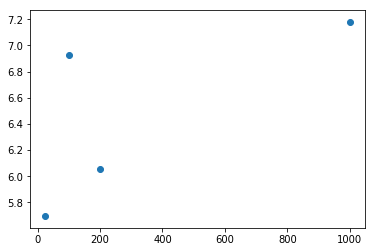

In [31]:
plt.scatter(testset.iloc[:,0], testset.iloc[:,20])
#testset.iloc[:,0:11]